## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')

                                                              

In [3]:
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = complete_data["Tumor Volume (mm3)"]
mean_numpy = np.mean(tumor_volume)
median_numpy = np.median(tumor_volume)
variance_numpy = np.var(tumor_volume, ddof = 1)
std_numpy = np.std(tumor_volume, ddof = 1)
sem_tumor = tumor_volume.sem()

studies = ["Tumor Volume (mm3)"]
summary_statistics = pd.DataFrame({"Mean": [mean_numpy],
                                   "Median": [median_numpy],
                                   "Variance": [variance_numpy],
                                   "Standard Deviation": [std_numpy],
                                   "SEM":[sem_tumor]
                                  }, index = studies)
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Tumor Volume (mm3),50.448381,48.951474,79.116074,8.894722,0.204436


## Bar plots

In [5]:
# Group by treatment regimen
drug_regimen_data = complete_data.groupby('Drug Regimen')
mouseid = drug_regimen_data['Mouse ID'].count()



In [6]:
# Number of Drug Regimen
drug_regimen = complete_data['Drug Regimen'].unique()


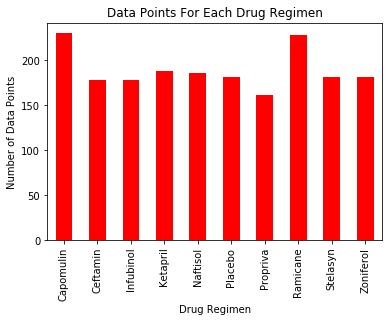

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

bar_plot = mouseid.plot.bar(color = 'r');
plt.title("Data Points For Each Drug Regimen");
plt.xlabel("Drug Regimen");
plt.ylabel("Number of Data Points");
bar_plot


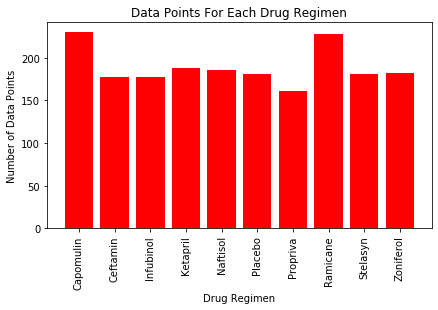

In [20]:

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(drug_regimen))
# Create ticks for the bar chart's x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouseid.keys(), rotation = 'vertical')

plt.bar(x_axis, mouseid, color = "r")
plt.tight_layout()

#set x,y labels and title
plt.xlabel("Drug Regimen");
plt.ylabel("Number of Data Points");
plt.title("Data Points For Each Drug Regimen");


## Pie plots

In [21]:
gender_group = complete_data.groupby(['Sex'])
gender_group.count()
 # gender_group.count().loc[:,'Mouse ID':]


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


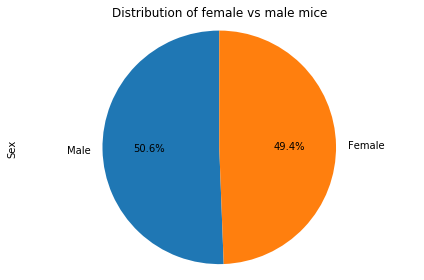

In [29]:
gender_group.count().columns
gender_group['Mouse ID'].count()

# find the numbers of each gender
gender_numbers = complete_data['Sex'].value_counts()

# define each gender
genders = complete_data['Sex'].unique()

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = gender_numbers.plot(kind='pie', y=genders, title="Distribution of female vs male mice", startangle=90, autopct="%1.1f%%")

plt.axis("equal")
plt.tight_layout()


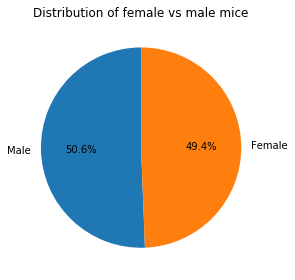

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_numbers, labels = genders, startangle = 90, autopct="%1.1f%%");
plt.title("Distribution of female vs male mice")
plt.tight_layout()

## Quartiles, outliers and boxplots

In [33]:
tumor_volume = drug_regimen_data['Tumor Volume (mm3)'].sum()

tumor_volume.sort_values( ascending = True)

Drug Regimen
Propriva      8423.930878
Ramicane      9169.417875
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Zoniferol     9689.044192
Placebo       9780.078122
Stelasyn      9816.199991
Naftisol     10105.671026
Ketapril     10384.299876
Name: Tumor Volume (mm3), dtype: float64

In [37]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# final tumor volumes of the top 4 most promising treatment regimens: Capomulin, Ramicane, Infubinol, Ceftamin
ramicane_data = complete_data.loc[(complete_data['Drug Regimen'] == "Ramicane"), :]
final_tumorvolume_ramicane = ramicane_data.loc[(ramicane_data['Timepoint'] == 45), 'Tumor Volume (mm3)']
capomulin_data = complete_data.loc[(complete_data['Drug Regimen'] == "Capomulin"), :]
final_tumorvolume_capomulin = capomulin_data.loc[(capomulin_data['Timepoint'] == 45), 'Tumor Volume (mm3)']
infubinol_data = complete_data.loc[(complete_data['Drug Regimen'] == "Infubinol"), :]
final_tumorvolume_infubinol = infubinol_data.loc[(infubinol_data['Timepoint'] == 45), 'Tumor Volume (mm3)']
ceftamin_data = complete_data.loc[(complete_data['Drug Regimen'] == "Ceftamin"), :]
final_tumorvolume_ceftamin = ceftamin_data.loc[(ceftamin_data['Timepoint'] == 45), 'Tumor Volume (mm3)']
        
RC = final_tumorvolume_ramicane.append(final_tumorvolume_capomulin)
RCI = RC.append(final_tumorvolume_infubinol)
final_tumor_volumes = RCI.append(final_tumorvolume_ceftamin)



# Quartile calculations
quartiles = final_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = [0.50]
upperq = quartiles[0.75]
iqr = upperq - lowerq



In [38]:
# Find any outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
biggest_tumor = final_tumor_volumes.max()
smallest_tumor = final_tumor_volumes.min()
print(f"the highest tumor volume is {biggest_tumor} and the lowest tumor volume is {smallest_tumor} therefore there are no outliers")


Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.
the highest tumor volume is 72.2267309 and the lowest tumor volume is 22.05012627 therefore there are no outliers


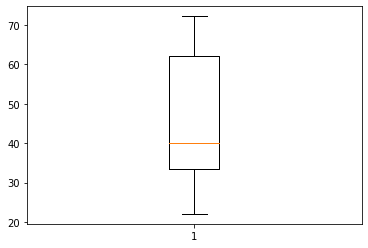

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# create the boxplot 
fig1,ax1 = plt.subplots()
ax1.boxplot(final_tumor_volumes);

## Line and scatter plots

In [ ]:
# Get the data for just capomulin from the raw data
capomulin = complete_data.loc[complete_data['Drug Regimen'] == "Capomulin", :]
# group by Mouse ID and Timepoint
capomulin_group = capomulin.groupby(["Mouse ID",'Timepoint'])
capomulin_group_tumorvolume = capomulin_group['Tumor Volume (mm3)'].sum()


In [ ]:
# A list of mouse IDs to test:
list_of_mouseIDs = capomulin['Mouse ID'].unique()
list_of_mouseIDs

In [229]:
# Make a varaible called mouse_id and store 'Mouse ID's in it
mouse_id = "y793"
# Get the keys and values for the stated Mouse ID
just_one_mouse = capomulin_group_tumorvolume.loc[mouse_id]
mouse_list = just_one_mouse.keys()
mouse_list_tumorvolume = just_one_mouse.values



(29.47541076, 47.0)

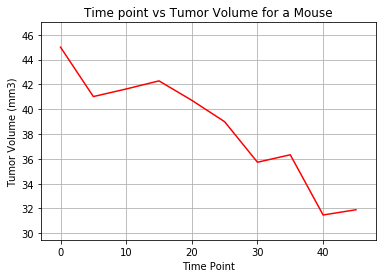

In [135]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(mouse_list, mouse_list_tumorvolume, color = "red")

# Add labels to the plot
plt.title("Time point vs Tumor Volume for a Mouse")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Add a grid for the chart
plt.grid()

#Set the x and y limits
plt.xlim((mouse_list.min()-3), (mouse_list.max()+3))
plt.ylim((mouse_list_tumorvolume.min()-2), (mouse_list_tumorvolume.max()+2))

Text(0, 0.5, 'Average Tumor Volume (mm3)')

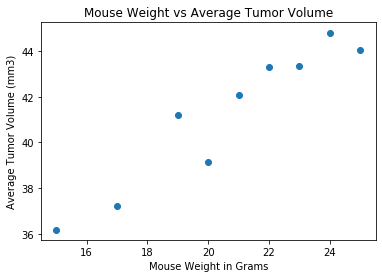

In [217]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_timepoint = capomulin["Timepoint"]
mouse_weight = capomulin.groupby(['Weight (g)'])

average_mouseweight = mouse_weight['Tumor Volume (mm3)'].mean()
# Find the x-values. x-values are the mouse weights 
average_mouseweight_keys = average_mouseweight.keys()

#Find the y-values. y-values are the average tumor volumes
average_mouseweight_values = average_mouseweight.values

# create the scatter plot
plt.scatter(average_mouseweight_keys, average_mouseweight_values)

# Set the x,y labels and title
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")


In [193]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Correlation Coefficient
correlation_coefficient = round(st.pearsonr(average_mouseweight_keys, average_mouseweight_values)[0],2)
correlation_coefficient


0.95

The r-squared is: 0.950524396185527


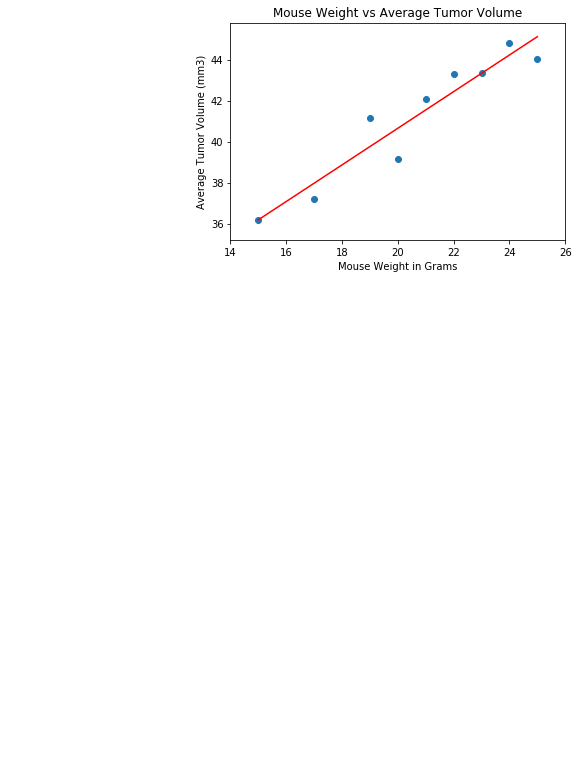

In [216]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_mouseweight_keys, average_mouseweight_values)
regress_values = average_mouseweight_keys*slope + intercept
line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(average_mouseweight_keys, average_mouseweight_values)
plt.plot(average_mouseweight_keys,regress_values, color = "red")
plt.annotate(line_equation, (6,10), fontsize = 15, color="red")

plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")

# x and y limits
plt.xlim(average_mouseweight_keys.min()-1, average_mouseweight_keys.max()+1)
plt.ylim(average_mouseweight_values.min()-1, average_mouseweight_values.max()+1)

print(f"The r-squared is: {rvalue}")

# 3 Observations:
1) Ramicane and ketapril regimen had the most data points so their data should be more stable because an error in the statistic will have a lesser effect on the general observation data
2) The correlation coefficient sits at around 0.95 for the mouse weight and the average tumor volume. With the Pearson Coefficient ranges from -1 to +1 with +1 being the result of a perfect positive correlation between the two variables. We can then see that the weight of the mouse is near perfectly positively correlated with tumor volumes
3) From testing the mouse with ID: y793, we can see tumor volume decreases as time goes by